In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [13]:
################################
# NON-HYPERPARAMETER CONSTANTS #
################################
final_dataset_location = '/Volumes/GoogleDrive/My Drive/Crime Data/Final Folder/'
playground_dataset_location = '/Volumes/GoogleDrive/My Drive/Crime Data/Composute Data/Sean Workspace/'
trial_file_location = '/Users/sean/Documents/Education/Stanford/230/Project/Sean/Trials/'
# trial_file_location = '/home/ec2-user/cs230/crime_prediction/Sean/Trials/'
pickled_model_location = '/Users/sean/Documents/Education/Stanford/230/Project/Sean/Trials/Pickled Models/Trial %d.ckpt'
# pickled_model_location = '/home/ec2-user/cs230/crime_prediction/Sean/Trials/Pickled Models/Trial %d.ckpt'
trial_file_format = 'Trial %d.xlsx'
epochs_between_prints = 100
hyperparameter_file_columns = ['Epoch Cost',
                               'Train Accuracy',
                               'Dev Accuracy',
                               'Duration',
                               'Dev Set Proportion',
                               'Test Set Proportion',
                               'Train Set Proportion',
                               'Learning Rate',
                               'Goal Total Epochs',
                               'Minibatch Size',
                               'Hidden Units per Layer',
                               'Hidden Layers',
                               'Dataset',
                               'Optimizer Name',
                               'L2 Regularization Lambda']

There have been 66 training epochs.
The best dev set accuracy is 0.228898.
The corresponding train accuracy is 0.225815.
This was recorded on epoch 2.
Average epoch duration is 40.409512 seconds.


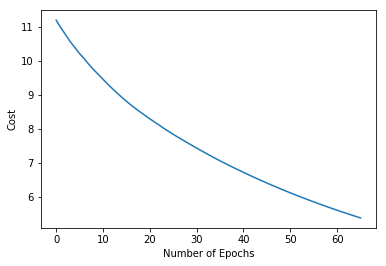

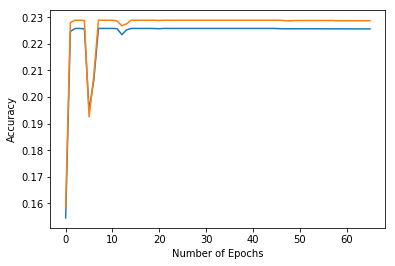

In [41]:
###################################################
# RETRIEVE AND PLOT THE MODEL'S TRAINING PROGRESS #
###################################################

trial_number = 36

if os.path.isfile(trial_file_location+trial_file_format % trial_number):
    hyperparameter_data = pd.read_excel(trial_file_location+trial_file_format % trial_number)
    costs = hyperparameter_data['Epoch Cost'].values
    train_accuracies = hyperparameter_data['Train Accuracy'].values
    dev_accuracies = hyperparameter_data['Dev Accuracy'].values
    average_duration = np.mean(hyperparameter_data['Duration'].values)
    
    # Print best dev accuracy and corresponding test accuracy
    best_dev_index = np.argmax(dev_accuracies)
    print('There have been %d training epochs.' % len(costs))
    print('The best dev set accuracy is %f.' % dev_accuracies[best_dev_index])
    print('The corresponding train accuracy is %f.' % train_accuracies[best_dev_index])
    print('This was recorded on epoch %d.' % best_dev_index)
    print('Average epoch duration is %f seconds.' % average_duration)

    # Plot cost
    cost_line, = plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Number of Epochs')
    plt.show()

    # Plot train and dev accuracy
    train_line, = plt.plot(np.squeeze(train_accuracies))
    dev_line, = plt.plot(np.squeeze(dev_accuracies))
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Epochs')
    plt.show()
else:
    print("Trial not recorded.")